# PYTHON ML PROJECT :

## Book's rating Prediction


#  

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Libraries Import
# 

In [105]:
#Importing Libraries :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### --------------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing and preparing the dataset
(The dataset has already been cleared manually for some misformatted values in csv)

In [2]:
data = pd.read_csv("Input/books.csv", sep=",")

In [3]:
#DataFrame information :
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


Useful fields:
- bookID to identify the book
- title to have an idea of what is the book
- authors, publisher, language_code, num_pages and publication_date to make potential link between several books / clustering
- average_rating main numerical parameter to evaluate the book that we will try to predict
- ratings_count will help us to understand the pertinence of a rating
- text_reviews_count may be useful to see the commitment of readers for the book

We can already remove isbn and isbn13 as other identifier won't be useful in our study

In [60]:
dfBooks = data.set_index("bookID").drop(['isbn','isbn13'],axis=1)
#COnverting date
dfBooks['publication_date'] = pd.to_datetime(dfBooks['publication_date'],format='%m/%d/%Y',errors='coerce')
#renaming num_pages column to remove space:
dfBooks = dfBooks.rename(columns={"  num_pages": "num_pages"})
dfBooks.head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,2005-04-26,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,2005-09-12,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-11-01,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books


In [5]:
dfBooks.tail(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,por,160,207,16,2003-08-15,Editorial Presença
45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,por,147,396,37,2003-04-08,Editorial Presença
45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,por,176,161,14,2004-09-01,Editorial Presença
45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,por,160,215,11,2003-10-11,Editorial Presença
45630,Whores for Gloria,William T. Vollmann,3.69,en-US,160,932,111,1994-02-01,Penguin Books
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books
45639,Poor People,William T. Vollmann,3.72,eng,434,769,139,2007-02-27,Ecco



### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Analysis of the content of each field : 

# 

In [61]:
#Checking for null values inside our dataframe:
print("Any Null values in the dataset : ",dfBooks.isnull().values.any())
print("\nAny duplicate values in the dataset : ",dfBooks.duplicated().any())

Any Null values in the dataset :  True

Any duplicate values in the dataset :  False


##### We have no duplicates, but there are null values let's see if we can correct them :



In [62]:
dfBooks.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [63]:
#Parsing date must have raised some error due to the initial date format let's correct them :
dfBooks[dfBooks['publication_date'].isna()]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,eng,718,10608,295,NaT,Bantam Books
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,fre,640,15,2,NaT,Folio histoire


In [67]:
#DateReplace = data[(data['bookID'] == 31373) | (data['bookID'] == 45531) ]
#print(DateReplace)
dfBooks.drop([31373,45531], axis=0, inplace=True)

In [68]:
dfBooks.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

##### These dates were unvalid so we removed these 2 rows


##### Let's see the contents of the other columns of interest
##### Language Code :

All languages and their number of appearance : 
 eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
gla         1
nl          1
ara         1
ale         1
wel         1
msa         1
tur         1
srp         1
glg         1
nor         1
Name: language_code, dtype: int64


There are :  27  different languages.




<AxesSubplot:ylabel='Language Distribution'>

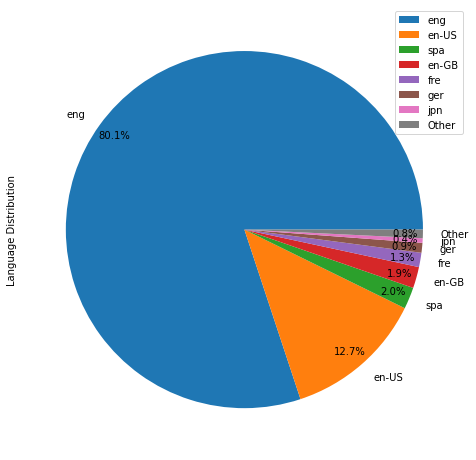

In [10]:
#Checking repartition of title or author would be irrelevant as they are meant for our understanding and not clustering

#Language repartition
AllLanguageDistribution = dfBooks.language_code.value_counts()
print("All languages and their number of appearance : \n",AllLanguageDistribution)
Nlang = AllLanguageDistribution.size
print("\n\nThere are : ",Nlang," different languages.\n\n")
TopLanguageDistribution = AllLanguageDistribution.head(7).append(pd.Series([AllLanguageDistribution.tail(Nlang-7).sum()],["Other"]))
TopLanguageDistribution.plot(kind='pie', figsize=(8,30), legend=True,autopct='%1.1f%%', 
                                                  pctdistance=0.9,radius=1,label="Language Distribution")

##### There does not seem to be any abnormal value in language, and as expected english is the main language

#### General Numerical fields :

In [11]:
dfBooks.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498
std,0.352445,241.127305,1.124794e+05,2576.176608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.135000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


##### On a statistic basis the results seem normal for books, it tends to show that most books may be novels as the average number of pages is 336. There is more commitment from the reader for giving ratings than for posting reviews which is normal, as each book receive on average more than 1000 ratings we could use this to filter out irrevelant ratings.

#### Average Ratings

Text(0.5, 0, 'Rating')

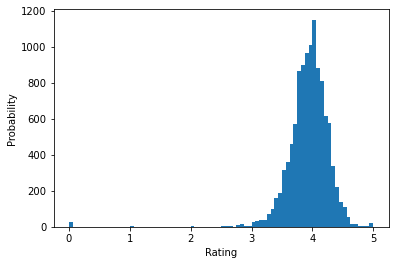

In [12]:
plt.hist(dfBooks.average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

<AxesSubplot:>

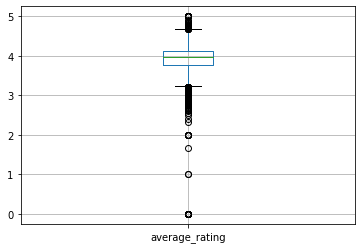

In [13]:
dfBooks.boxplot(column=['average_rating'])

Text(0.5, 0, 'Rating')

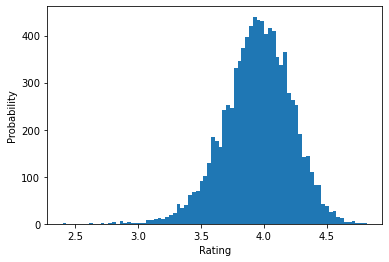

In [14]:
# Ratings distribution for books having more than 50 ratings
plt.hist(dfBooks.loc[dfBooks['ratings_count']>50].average_rating,bins=80)
plt.ylabel('Probability')
plt.xlabel('Rating')

##### We can see the ratings seem to follow a normal distribution centered on 3.9, by removing books having too little review it is even more visible

#### Top 10 Publishers :

In [15]:
dfBooks.publisher.value_counts().head(10)

Vintage             318
Penguin Books       261
Penguin Classics    184
Mariner Books       150
Ballantine Books    144
Harper Perennial    112
HarperCollins       112
Pocket Books        111
Bantam              110
VIZ Media LLC        88
Name: publisher, dtype: int64

#### Distribution of Publication Date recorded on the website :

Text(0.5, 0, 'Date')

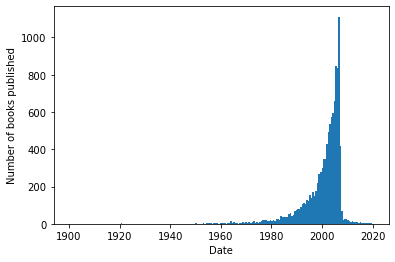

In [16]:
plt.hist(dfBooks.publication_date,bins=200)
plt.ylabel('Number of books published')
plt.xlabel('Date')

##### There is a drop after 2006, by checking the data it is normal on data side : it seems the website is not filed with much data starting from 2006 publication date.

In [17]:
dfBooks.corr()

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.150809,0.038205,0.033734
num_pages,0.150809,1.000000,0.034353,0.036998
ratings_count,0.038205,0.034353,1.000000,0.865979
text_reviews_count,0.033734,0.036998,0.865979,1.000000


At first the only correlation visible is between ratings_count and text_review_count as we could expect since usually the more there are users giving a rating, the more there will be review posted

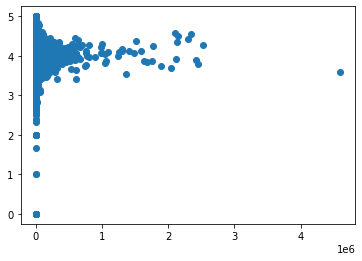

In [18]:
plt.scatter(dfBooks['ratings_count'],dfBooks['average_rating'])

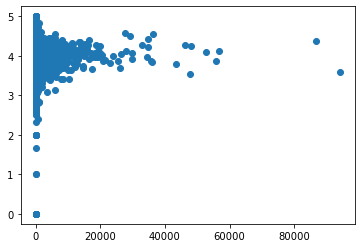

In [19]:
plt.scatter(dfBooks['text_reviews_count'],dfBooks['average_rating'])

In [20]:
dfBooks.head(10)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,2005-04-26,Nimble Books
10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,2005-09-12,Scholastic
12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-11-01,Gramercy Books
13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books


### Linear Regression on numerical data

In [21]:
#Study dataframe (removing title as it is unecessary for clustering and prediction) :
#df = dfBooks.drop(['title','authors','language_code','publisher','publication_date'],axis=1)
df = dfBooks.copy()

df_train, df_test = train_test_split(df,test_size = 0.2)
df_train

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
17279,The Feynman Lectures on Physics Vols 5-6,Richard P. Feynman,4.59,en-US,12,22,0,2004-11-03,Basic Books
2330,The Languages of Tolkien's Middle-Earth,Ruth S. Noel/J.R.R. Tolkien,3.98,eng,207,4685,74,1980-05-28,Houghton Mifflin Company
37737,Fudge-a-Mania (Fudge #4),Judy Blume,4.01,eng,176,26588,538,2004-01-06,Berkley
1067,1776,David McCullough,4.07,eng,386,166916,6243,2006-07-04,Simon Schuster
38928,Three Little Secrets (MacLachlan Family #4),Liz Carlyle,3.84,eng,384,1181,50,2006-04-01,Pocket Star
...,...,...,...,...,...,...,...,...,...
13211,And Still I Rise,Maya Angelou/Linda Sunshine/Diego Rivera,4.42,eng,54,3720,240,2001-08-07,Random House
28116,The Know-It-All: One Man's Humble Quest to Bec...,A.J. Jacobs,3.76,eng,389,24243,2326,2005-10-10,Simon Schuster
40326,More Plums in One (Stephanie Plum #4-6),Janet Evanovich,4.45,en-US,792,219,11,2007-04-03,St. Martin's Press


In [22]:
#Size of our original dataframe, the training one and the testing one
print(len(df), len(df_train), len(df_test))

11127 8901 2226


In [23]:
# get the values of the columns for the training data
X_train = df_train.drop(['average_rating'],axis=1)
y_train = df_train['average_rating']
print(y_train)
print(X_train)

#And for test date
X_test = df_test.drop(['average_rating'],axis=1)
y_test = df_test['average_rating']

bookID
17279    4.59
2330     3.98
37737    4.01
1067     4.07
38928    3.84
         ... 
13211    4.42
28116    3.76
40326    4.45
34918    4.27
40132    4.17
Name: average_rating, Length: 8901, dtype: float64
                                                    title  \
bookID                                                      
17279            The Feynman Lectures on Physics Vols 5-6   
2330              The Languages of Tolkien's Middle-Earth   
37737                           Fudge-a-Mania (Fudge  #4)   
1067                                                 1776   
38928        Three Little Secrets (MacLachlan Family  #4)   
...                                                   ...   
13211                                    And Still I Rise   
28116   The Know-It-All: One Man's Humble Quest to Bec...   
40326            More Plums in One (Stephanie Plum  #4-6)   
34918   The Voyage of the Jerle Shannara Trilogy (Voya...   
40132   Leonardo on Painting: An Anthology of Writings..

In [24]:
#OLD Method

# get the values of the columns for the training data
X_train = df_train.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']]#.values
y_train = df_train.average_rating#.values
print(y_train)
print(X_train)

#And for test date
X_test = df_test.loc[:,['num_pages', 'ratings_count', 'text_reviews_count']]#.values
y_test = df_test.average_rating#.values

bookID
17279    4.59
2330     3.98
37737    4.01
1067     4.07
38928    3.84
         ... 
13211    4.42
28116    3.76
40326    4.45
34918    4.27
40132    4.17
Name: average_rating, Length: 8901, dtype: float64
        num_pages  ratings_count  text_reviews_count
bookID                                              
17279          12             22                   0
2330          207           4685                  74
37737         176          26588                 538
1067          386         166916                6243
38928         384           1181                  50
...           ...            ...                 ...
13211          54           3720                 240
28116         389          24243                2326
40326         792            219                  11
34918        1260             87                   4
40132         336            120                   4

[8901 rows x 3 columns]


In [25]:
# Model Initialization
#linear_model = LogisticRegression(random_state=0,max_iter=5000)
linear_model = LinearRegression()

# Model Training
linear_model.fit(X=X_train, y=y_train)

LinearRegression()

In [26]:
y_test_predicted = linear_model.predict(X_test)

linear_model.score(X_test,y_test)

pandas.core.series.Series

In [27]:
linear_model.score(X_test,y_test)

0.02599200082833708

In [29]:
dfBooks

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,eng,512,156,20,2004-12-21,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,eng,635,783,56,1988-12-01,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,eng,415,820,95,1993-08-01,Penguin Books


In [162]:
#Author adaptation

author_meanrating = dfBooks[["authors","average_rating"]].groupby(["authors"]).mean().sort_values(by=['average_rating'])
author_ranking = author_meanrating
author_ranking['author_rank'] = author_meanrating["average_rating"].rank(method='dense', ascending=False)
author_ranking.tail(50)


new_book_df1 = dfBooks.merge(author_ranking,  on='authors',suffixes=('','_y')).drop( ['average_rating_y','authors'],axis=1)
new_book_df1

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,author_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,32.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,32.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,32.0
3,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,eng,2690,41428,164,2004-09-13,Scholastic,32.0
4,Harry Potter and the Chamber of Secrets (Harry...,4.42,eng,341,2293963,34692,1999-06-02,Arthur A. Levine Books / Scholastic Inc.,32.0
...,...,...,...,...,...,...,...,...,...
11120,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,2003-08-15,Editorial Presença,323.0
11121,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,2003-04-08,Editorial Presença,323.0
11122,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,2004-09-01,Editorial Presença,323.0
11123,O Príncipe Caspian (As Crónicas de Nárnia #4),3.97,por,160,215,11,2003-10-11,Editorial Presença,323.0


In [163]:
#Publisher adaptation

publisher_meanrating = new_book_df1[["publisher","average_rating"]].groupby(["publisher"]).mean().sort_values(by=['average_rating'])
publisher_ranking = publisher_meanrating
publisher_ranking['publisher_rank'] = publisher_meanrating["average_rating"].rank(method='dense', ascending=False)
publisher_ranking.tail(50)


new_book_df2 = new_book_df1.merge(publisher_ranking,  on='publisher',suffixes=('','_y')).drop( ['average_rating_y','publisher'],axis=1)
new_book_df2

,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,author_rank,publisher_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,2006-09-16,32.0,207.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,2004-09-01,32.0,207.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,2004-05-01,32.0,207.0
3,The Long-Lost Map (Ulysses Moore #2),4.00,eng,272,1693,76,2006-07-01,335.0,207.0
4,The Eternity Code (Artemis Fowl #3),4.04,eng,309,221,13,2003-10-01,460.0,207.0
...,...,...,...,...,...,...,...,...,...
11120,A Última Batalha (As Crónicas de Nárnia #7),4.03,por,149,211,24,2004-07-17,323.0,278.0
11121,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,2003-08-15,323.0,278.0
11122,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,2003-04-08,323.0,278.0
11123,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,2004-09-01,323.0,278.0


In [164]:
#Transformation for publication date (Numerical timestamp give information of the relative time ranking)


#x = dfBooks.iloc[1]['publication_date'].strftime("%d/%m/%Y")
new_book_df3 = new_book_df2
new_book_df3['publidate'] = new_book_df3['publication_date'].apply(lambda x: x.value)
new_book_df3 = new_book_df3.drop( ['publication_date'],axis=1)

new_book_df3


,title,average_rating,language_code,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,eng,652,2095690,27591,32.0,207.0,1158364800000000000
1,Harry Potter and the Order of the Phoenix (Har...,4.49,eng,870,2153167,29221,32.0,207.0,1093996800000000000
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,eng,435,2339585,36325,32.0,207.0,1083369600000000000
3,The Long-Lost Map (Ulysses Moore #2),4.00,eng,272,1693,76,335.0,207.0,1151712000000000000
4,The Eternity Code (Artemis Fowl #3),4.04,eng,309,221,13,460.0,207.0,1064966400000000000
...,...,...,...,...,...,...,...,...,...
11120,A Última Batalha (As Crónicas de Nárnia #7),4.03,por,149,211,24,323.0,278.0,1090022400000000000
11121,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,3.92,por,160,207,16,323.0,278.0,1060905600000000000
11122,O Sobrinho do Mágico (As Crónicas de Nárnia #1),4.04,por,147,396,37,323.0,278.0,1049760000000000000
11123,A Viagem do Caminheiro da Alvorada (As Crónica...,4.09,por,176,161,14,323.0,278.0,1093996800000000000


In [175]:
#Language adaptation

language_meanrating = new_book_df3[["language_code","average_rating"]].groupby(["language_code"]).mean().sort_values(by=['average_rating'])
language_ranking = language_meanrating
language_ranking['language_rank'] = language_meanrating["average_rating"].rank(method='dense', ascending=False)
#language_ranking.tail(50)


new_book_df4 = new_book_df3.merge(language_ranking,  on='language_code',suffixes=('','_y')).drop( ['average_rating_y','language_code'],axis=1)
new_book_df4


,title,average_rating,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate,language_rank
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,652,2095690,27591,32.0,207.0,1158364800000000000,17.0
1,Harry Potter and the Order of the Phoenix (Har...,4.49,870,2153167,29221,32.0,207.0,1093996800000000000,17.0
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,435,2339585,36325,32.0,207.0,1083369600000000000,17.0
3,The Long-Lost Map (Ulysses Moore #2),4.00,272,1693,76,335.0,207.0,1151712000000000000,17.0
4,The Eternity Code (Artemis Fowl #3),4.04,309,221,13,460.0,207.0,1064966400000000000,17.0
...,...,...,...,...,...,...,...,...,...
11120,Venac sonetnih venaca; Puževa srma,0.00,222,0,0,838.0,792.0,820454400000000000,27.0
11121,Os libros arden mal,3.36,741,36,2,772.0,748.0,1151107200000000000,26.0
11122,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.00,150,1,0,1.0,1.0,551318400000000000,1.0
11123,In Wonderland,3.60,185,86,8,511.0,704.0,1062374400000000000,23.0


In [176]:
#correlation between columns
book_df_processed = new_book_df4.drop(columns=[ 'title'])

book_df_processed.corr()

,average_rating,num_pages,ratings_count,text_reviews_count,author_rank,publisher_rank,publidate,language_rank
average_rating,1.000000,0.150763,0.038209,0.033740,-0.780395,-0.508540,-0.027938,-0.088992
num_pages,0.150763,1.000000,0.034387,0.037043,-0.117961,-0.029265,-0.017974,0.007965
ratings_count,0.038209,0.034387,1.000000,0.865978,-0.025192,-0.010364,0.043938,-0.023707
text_reviews_count,0.033740,0.037043,0.865978,1.000000,-0.015846,0.012121,0.065969,-0.026446
author_rank,-0.780395,-0.117961,-0.025192,-0.015846,1.000000,0.537324,0.037565,0.097407
publisher_rank,-0.508540,-0.029265,-0.010364,0.012121,0.537324,1.000000,0.013653,0.099033
publidate,-0.027938,-0.017974,0.043938,0.065969,0.037565,0.013653,1.000000,0.034764
language_rank,-0.088992,0.007965,-0.023707,-0.026446,0.097407,0.099033,0.034764,1.000000


In [179]:
#Splitting data for training and testing :

df_train, df_test = train_test_split(book_df_processed,test_size = 0.2)

X_train = df_train.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                          'publisher_rank','publidate']].values
y_train = df_train.average_rating.values

X_test = df_test.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                          'publisher_rank','publidate']].values
y_test = df_test.average_rating.values

In [193]:
#Linear Model :

lr = LinearRegression()
lr.fit(X_train, y_train)

y_test_predicted = lr.predict(X_test)

lr.score(X_test,y_test)

0.7421796464302971

In [207]:
#Evaluating precision of the model :

PrecisionList = []

for i in range(100):
        df_train, df_test = train_test_split(book_df_processed,test_size = 0.2)

        X_train = df_train.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                          'publisher_rank','publidate']].values
        y_train = df_train.average_rating.values

        X_test = df_test.loc[:,['author_rank', 'num_pages','language_rank','ratings_count','text_reviews_count',
                          'publisher_rank','publidate']].values
        y_test = df_test.average_rating.values
        lri = LinearRegression()
        lri.fit(X_train, y_train)
        
        score = lr.score(X_test,y_test)
        
        PrecisionList.append(score)
        
#print(PrecisionList)
print("\nAverage score is : ",sum(PrecisionList)/len(PrecisionList))


Average score is :  0.6270233259652778
